---

#  Date to iLOC Extrapolation

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas     as pd
import mplfinance as mpf
import datetime   as datetime
import numpy      as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [3]:
def date_to_mdate(date):
    """Convert a `date` to a matplotlib date:
    
    Input: `date` may be any of:
        (1) parseble string containing a date or datetime as a string,
        (2) python `datetime.date` or `datetime.datetime`,object
        (3) pandas.Timestamp object
    
    Returns a Matplotlib Date: floating point number of days from 01-Jan-0001, plus one day.
    """
    if isinstance(date,str):
        pydt = pd.to_datetime(date).to_pydatetime()
    elif isinstance(date,pd.Timestamp):
        pydt = date.to_pydatetime()
    elif isinstance(date,(datetime.datetime,datetime.date)):
        pydt = date
    else:
        return None
    return mdates.date2num(pydt)

In [4]:
def date_to_iloc(dtseries,date):
    d1s = dtseries.loc[date:]
    if len(d1s) < 1:
        sdtrange = str(dtseries[0])+' to '+str(dtseries[-1])
        raise ValueError('User specified line date "'+str(date)+
                         '" is beyond (greater than) range of plotted data ('+sdtrange+').')
    d1 = d1s.index[0]
    d2s = dtseries.loc[:date]
    if len(d2s) < 1:
        sdtrange = str(dtseries[0])+' to '+str(dtseries[-1])
        raise ValueError('User specified line date "'+str(date)+
                         '" is before (less than) range of plotted data ('+sdtrange+').')
    d2 = dtseries.loc[:date].index[-1]
    # If there are duplicate dates in the series, for example in a renko plot
    # then .get_loc(date) will return a slice containing all the dups, so:
    loc1 = dtseries.index.get_loc(d1)
    if isinstance(loc1,slice): loc1 = loc1.start
    loc2 = dtseries.index.get_loc(d2)
    if isinstance(loc2,slice): loc2 = loc2.stop - 1
    return (loc1+loc2)/2.0

In [5]:
def date_to_iloc_linear(dtseries,date):
    d1 = date_to_mdate(dtseries.index[0])
    d2 = date_to_mdate(dtseries.index[-1])

    print('d1,d2=',d1,d2)
    i1 = 0.0
    i2 = len(dtseries) - 1.0
    print('i1,i2=',i1,i2)
    
    slope   = (i2 - i1) / (d2 - d1)
    yitrcpt = i1 - (slope*d1)
    print('slope,yitrcpt=',slope,yitrcpt)
    yitrcpt = i2 - (slope*d2)
    print('slope,yitrcpt=',slope,yitrcpt)
    return (slope,yitrcpt)
    
    
#     d2s = dtseries.loc[:date]
#     if len(d2s) < 1:
#         sdtrange = str(dtseries[0])+' to '+str(dtseries[-1])
#         raise ValueError('User specified line date "'+str(date)+
#                          '" is before (less than) range of plotted data ('+sdtrange+').')
#     d2 = dtseries.loc[:date].index[-1]
#     # If there are duplicate dates in the series, for example in a renko plot
#     # then .get_loc(date) will return a slice containing all the dups, so:
#     loc1 = dtseries.index.get_loc(d1)
#     if isinstance(loc1,slice): loc1 = loc1.start
#     loc2 = dtseries.index.get_loc(d2)
#     if isinstance(loc2,slice): loc2 = loc2.stop - 1
#     return (loc1+loc2)/2.0

In [51]:
# Read in daily data for the S&P 500 from November of 2019: 
#daily = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily = pd.read_csv('../data/yahoofinance-SPY-20200901-20210113.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily = daily.loc['2020-09-01':'2021-1-31',:]
daily.shape
daily.head(2)
daily.tail(2)

(92, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-01,350.209991,352.709991,349.239990,352.600006,349.703522,54999300
2020-09-02,354.670013,358.750000,353.429993,357.700012,354.761627,69540000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-11,377.850006,380.579987,377.720001,378.690002,378.690002,51176700
2021-01-12,378.890015,379.859985,376.359985,378.769989,378.769989,52445000


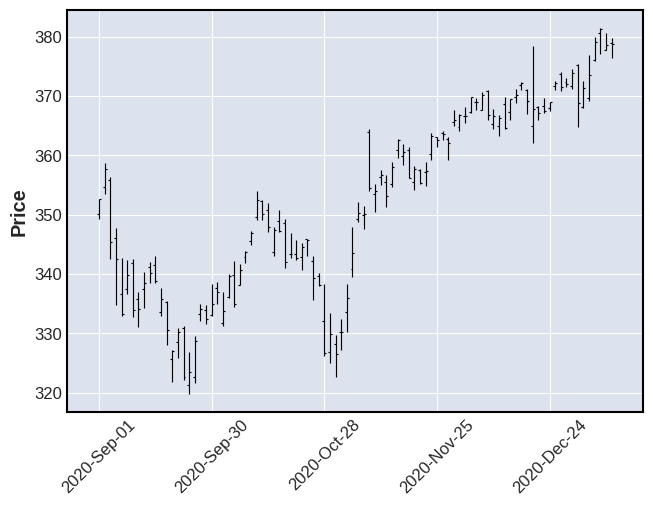

In [52]:
mpf.plot(daily)

In [53]:
cpx = daily['Close']['2020-11-1':'2020-11-30']
cpx

Date
2020-11-02    330.200012
2020-11-03    336.029999
2020-11-04    343.540009
2020-11-05    350.239990
2020-11-06    350.160004
2020-11-09    354.559998
2020-11-10    354.040009
2020-11-11    356.670013
2020-11-12    353.209991
2020-11-13    358.100006
2020-11-16    362.570007
2020-11-17    360.619995
2020-11-18    356.279999
2020-11-19    357.779999
2020-11-20    355.329987
2020-11-23    357.459991
2020-11-24    363.220001
2020-11-25    362.660004
2020-11-27    363.670013
2020-11-30    362.059998
Name: Close, dtype: float64

In [54]:
m,b = date_to_iloc_linear(cpx,0)

d1,d2= 18568.0 18596.0
i1,i2= 0.0 19.0
slope,yitrcpt= 0.6785714285714286 -12599.714285714286
slope,yitrcpt= 0.6785714285714286 -12599.714285714286


In [55]:
x = [x for x in range(len(daily))]
y = [y for y in daily['Close'].values]

In [56]:
#daily['Close']['2020-11-1':'2020-11-30']
offset = len(daily.loc[:cpx.index[-1]]) - len(cpx)
offset

43

In [57]:
dates = mdates.date2num(daily.index.to_pydatetime())
dates
x2 = [(m*d + b + offset) for d in dates]
x2
len(x2)
len(daily)
len(x)

array([18506., 18507., 18508., 18509., 18513., 18514., 18515., 18516.,
       18519., 18520., 18521., 18522., 18523., 18526., 18527., 18528.,
       18529., 18530., 18533., 18534., 18535., 18536., 18537., 18540.,
       18541., 18542., 18543., 18544., 18547., 18548., 18549., 18550.,
       18551., 18554., 18555., 18556., 18557., 18558., 18561., 18562.,
       18563., 18564., 18565., 18568., 18569., 18570., 18571., 18572.,
       18575., 18576., 18577., 18578., 18579., 18582., 18583., 18584.,
       18585., 18586., 18589., 18590., 18591., 18593., 18596., 18597.,
       18598., 18599., 18600., 18603., 18604., 18605., 18606., 18607.,
       18610., 18611., 18612., 18613., 18614., 18617., 18618., 18619.,
       18620., 18624., 18625., 18626., 18627., 18631., 18632., 18633.,
       18634., 18635., 18638., 18639.])

[0.928571428570649,
 1.607142857143117,
 2.285714285713766,
 2.964285714286234,
 5.678571428570649,
 6.357142857143117,
 7.035714285713766,
 7.714285714286234,
 9.75,
 10.428571428570649,
 11.107142857143117,
 11.785714285713766,
 12.464285714286234,
 14.5,
 15.178571428570649,
 15.857142857143117,
 16.535714285713766,
 17.214285714286234,
 19.25,
 19.92857142857065,
 20.607142857143117,
 21.285714285713766,
 21.964285714286234,
 24.0,
 24.67857142857065,
 25.357142857143117,
 26.035714285713766,
 26.714285714286234,
 28.75,
 29.42857142857065,
 30.107142857143117,
 30.785714285713766,
 31.464285714286234,
 33.5,
 34.17857142857065,
 34.85714285714312,
 35.535714285713766,
 36.214285714286234,
 38.25,
 38.92857142857065,
 39.60714285714312,
 40.285714285713766,
 40.964285714286234,
 43.0,
 43.67857142857065,
 44.35714285714312,
 45.035714285713766,
 45.714285714286234,
 47.75,
 48.42857142857065,
 49.10714285714312,
 49.785714285713766,
 50.464285714286234,
 52.5,
 53.17857142857065,
 

92

92

92

In [58]:
%%capture
fig = plt.figure(figsize=(16,8))
ax  = fig.add_subplot()

In [59]:
#yconst = [0.0]*len(cpx)

In [60]:
# ax.scatter(x,y,s=300,marker='^',c='c')
# ax.scatter(x2,y,s=300,marker='v',c='m')

# ax.scatter( x,y,s=200,marker='d',c='c')
# ax.scatter(x2,y,s=200,marker='d',c='m')

ax.scatter( x,y,s=600,marker='_',c='c')
ax.scatter(x2,y,s=600,marker='_',c='m')
ax.scatter( x,y,s=600,marker=2,c='c')
ax.scatter(x2,y,s=600,marker=2,c='m')


#ax.scatter( x,yconst,s=1200,marker=2,c='c')
#ax.scatter(x2,yconst,s=1200,marker=3,c='m')

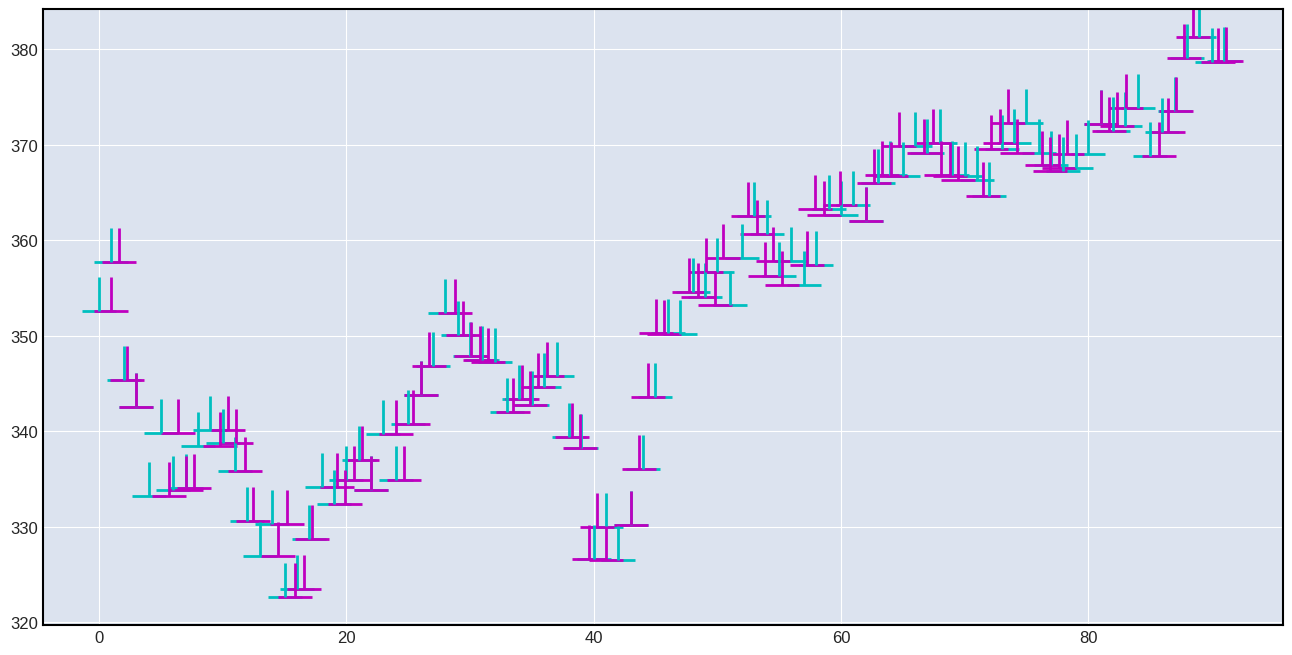

In [61]:
fig

In [62]:
df = pd.DataFrame([x,x2]).T
df.columns = ['x','x2']
df['diff'] = df.x - df.x2
df

,x,x2,diff
0,0.0,0.928571,-0.928571
1,1.0,1.607143,-0.607143
2,2.0,2.285714,-0.285714
3,3.0,2.964286,0.035714
4,4.0,5.678571,-1.678571
...,...,...,...
87,87.0,87.107143,-0.107143
88,88.0,87.785714,0.214286
89,89.0,88.464286,0.535714
90,90.0,90.500000,-0.500000


<AxesSubplot:>

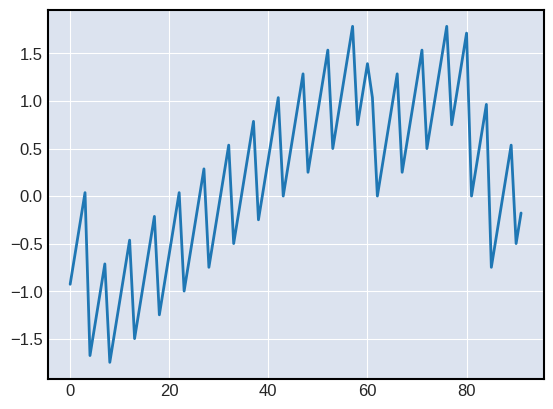

In [63]:
df['diff'].plot()

In [15]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
def generate_trend_line(series,date1,date2,price1=None,price2=None,show_nontrading=False,forward_only=False):
    """Return a trend line given two dates and a time-series.
       Input: Pandas series with a pandas.DatetimeIndex, and two dates:
              The two dates are used to determine two "prices" from the series, 
              or the prices may optionally be specified as `price1` and `price1`.
              `show_nontrading` optionally indicates that time-axis is continuous with respect to time
              `forward_only` optionally indicates whether to extrapolate both backwards and forwards, or forward only.
            
       Output: Trend line as 
    """
    if not isinstance(series,pd.Series):
        raise TypeError('First argument must be a Pandas.Series')
    index = series.index
    if not isinstance(index,pd.DatetimeIndex):
        raise TypeError('First argument, pandas.Series, MUST HAVE A Pandas.DatetimeIndex')
        
    p1 = series[date1] if price1 is None else price1
    p2 = series[date2] if price2 is None else price2

    if show_nontrading:
        d1 = date_to_mdate(date1)
        d2 = date_to_mdate(date2)
    else:
        d1 = float(index.get_loc(date1))
        d2 = float(index.get_loc(date2))
        
    slope = (p2-p1)/(d2-d1)
    yintercept = ((p1 - slope*d1) + (p2 - slope*d2)) / 2.0

    if show_nontrading:
        dates = mdates.date2num(index.tz_localize(None).to_pydatetime())
    else:
        dates = range(0,len(index))
        
    trend_line = []
    for dt in dates:
        trend_line.append(slope*dt + yintercept)
    if forward_only:
        ixd1 = index.get_loc(date1)
        for jj in range(0,ixd1):
            trend_line[jj] = np.nan

    return pd.Series(trend_line,index=index)